# Exploración de datos con `pandas`


In [279]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, Normalizer
from sklearn.impute import KNNImputer


## Elementos básicos de pandas

- Crear, leer y escribir
- Indexing en pandas
- Acceder a columnas
- Crear y borrar columnas
- Funciones para resumir
- Agrupar y ordenar
- Tipos de datos y datos faltantes
- Renombrar y remplazar información

### Crear, leer y escribir

In [280]:
# array
# listas
# diccionarios

In [281]:
A = np.array([[3, 4, 5],
             [3, 1, 2],
             [7, 8, 10]])
A

array([[ 3,  4,  5],
       [ 3,  1,  2],
       [ 7,  8, 10]])

In [282]:
df = pd.DataFrame(data=A, columns=['A', 'B', 'C'])
df

,A,B,C
0,3,4,5
1,3,1,2
2,7,8,10


In [283]:
B = np.random.normal(0, 10, size=(200, 4))

In [284]:
df2 = pd.DataFrame(data=B)
df2

,0,1,2,3
0,-19.018455,-3.733929,-9.284425,-6.480236
1,3.882677,8.783568,0.800556,-17.092461
2,-13.178864,-1.630866,8.413386,-6.514372
3,-22.339444,-7.262021,-13.777968,7.261293
4,19.894239,-2.863255,24.518231,0.210171
...,...,...,...,...
195,-7.357427,2.661220,-7.418299,5.272589
196,-16.627291,2.146063,3.604231,4.080626
197,1.216448,4.402103,-4.228375,0.385354
198,12.482870,6.957870,-2.503002,-0.994399


In [285]:
lista = [[3, 4, 1],
         [2, 9, 10],
         [3, 1, 3]]

In [286]:
pd.DataFrame(data=lista)

,0,1,2
0,3,4,1
1,2,9,10
2,3,1,3


In [287]:
df3 = pd.DataFrame({'col1': np.random.choice([np.nan, 0, 3, 4, 1], p=(0.1, 0.2, 0.2, 0.2, 0.3), size=100),
                    'col2': np.random.normal(0, 10, size=100),
                    'col3': np.random.choice(['m', 'f'], p=(0.65, 0.35), size=100),
                    'col4': np.random.uniform(-5, 10, size=100)})

In [288]:
df3

,col1,col2,col3,col4
0,NaN,8.408821,m,3.334667
1,1.0,1.897736,m,2.588125
2,3.0,-16.605823,f,-4.676657
3,0.0,-11.705034,f,-0.824164
4,0.0,-3.337451,m,-1.453056
...,...,...,...,...
95,1.0,-18.566251,m,-1.100545
96,NaN,-4.939916,f,-3.283561
97,4.0,6.628256,m,8.704642
98,0.0,-7.810256,f,-2.533070


In [289]:
# escribir
df2.to_csv('df2.csv', index=False)

In [290]:
# leer
mdf = pd.read_csv('/content/datos_marketing (1).csv')

### Exploración inicial

In [291]:
# head, tail, info
mdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0


In [292]:
mdf.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,84,3,61,2,1,21,3,1,4,no,0


In [293]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [294]:
# columns, index, shape

In [295]:
mdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Complain', 'AcceptedCmps'],
      dtype='object')

In [296]:
mdf.columns = mdf.columns.str.lower()

In [297]:
mdf.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'complain', 'acceptedcmps'],
      dtype='object')

In [298]:
mdf.index

RangeIndex(start=0, stop=2240, step=1)

In [299]:
mdf.shape

(2240, 19)

In [300]:
# corregir columnas

### Indexing en pandas

In [301]:
# iloc
mdf.iloc[0:10:2, 0:2]

,id,year_birth
0,5524,1957
2,4141,1965
4,5324,1981
6,965,1971
8,4855,1974


In [302]:
# loc
mdf.loc[0:10, 'marital_status']

0       Single
1       Single
2     Together
3     Together
4      Married
5     Together
6     Divorced
7      Married
8     Together
9     Together
10     Married
Name: marital_status, dtype: object

### Acceder a columnas

In [303]:
# como diccionario
mdf['education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: education, Length: 2240, dtype: object

In [304]:
mdf[['education', 'marital_status']]

,education,marital_status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [305]:
mdf.loc[mdf['education'] == 'Graduation', ['education','marital_status']]

,education,marital_status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
6,Graduation,Divorced
...,...,...
2232,Graduation,Single
2233,Graduation,Together
2234,Graduation,Married
2235,Graduation,Married


In [306]:
# punto
mdf.education

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: education, Length: 2240, dtype: object

### Crear y borrar columnas

In [307]:
# constante
df3['col5'] = 10
df3

,col1,col2,col3,col4,col5
0,NaN,8.408821,m,3.334667,10
1,1.0,1.897736,m,2.588125,10
2,3.0,-16.605823,f,-4.676657,10
3,0.0,-11.705034,f,-0.824164,10
4,0.0,-3.337451,m,-1.453056,10
...,...,...,...,...,...
95,1.0,-18.566251,m,-1.100545,10
96,NaN,-4.939916,f,-3.283561,10
97,4.0,6.628256,m,8.704642,10
98,0.0,-7.810256,f,-2.533070,10


In [308]:
# lista
df3['col6'] = [i for i in range(100)]
df3

,col1,col2,col3,col4,col5,col6
0,NaN,8.408821,m,3.334667,10,0
1,1.0,1.897736,m,2.588125,10,1
2,3.0,-16.605823,f,-4.676657,10,2
3,0.0,-11.705034,f,-0.824164,10,3
4,0.0,-3.337451,m,-1.453056,10,4
...,...,...,...,...,...,...
95,1.0,-18.566251,m,-1.100545,10,95
96,NaN,-4.939916,f,-3.283561,10,96
97,4.0,6.628256,m,8.704642,10,97
98,0.0,-7.810256,f,-2.533070,10,98


In [309]:
# otras columnas
df3['col7'] = df3['col5'] + df3['col6']
df3

,col1,col2,col3,col4,col5,col6,col7
0,NaN,8.408821,m,3.334667,10,0,10
1,1.0,1.897736,m,2.588125,10,1,11
2,3.0,-16.605823,f,-4.676657,10,2,12
3,0.0,-11.705034,f,-0.824164,10,3,13
4,0.0,-3.337451,m,-1.453056,10,4,14
...,...,...,...,...,...,...,...
95,1.0,-18.566251,m,-1.100545,10,95,105
96,NaN,-4.939916,f,-3.283561,10,96,106
97,4.0,6.628256,m,8.704642,10,97,107
98,0.0,-7.810256,f,-2.533070,10,98,108


In [310]:
# método apply
def function(row):
  if row['col4'] > 0:
    return 1
  return -1

df3['col8'] = df3.apply(function, axis=1)
df3

,col1,col2,col3,col4,col5,col6,col7,col8
0,NaN,8.408821,m,3.334667,10,0,10,1
1,1.0,1.897736,m,2.588125,10,1,11,1
2,3.0,-16.605823,f,-4.676657,10,2,12,-1
3,0.0,-11.705034,f,-0.824164,10,3,13,-1
4,0.0,-3.337451,m,-1.453056,10,4,14,-1
...,...,...,...,...,...,...,...,...
95,1.0,-18.566251,m,-1.100545,10,95,105,-1
96,NaN,-4.939916,f,-3.283561,10,96,106,-1
97,4.0,6.628256,m,8.704642,10,97,107,1
98,0.0,-7.810256,f,-2.533070,10,98,108,-1


In [311]:
mdf

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0


In [312]:
mdf['complain'].unique()

array(['no', 'yes'], dtype=object)

In [313]:
# método map
dic1 = {'yes': 1,
        'no': 0}

mdf['complain'] = mdf['complain'].map(dic1)

In [314]:
mdf['complain'].unique()

array([0, 1])

In [315]:
mdf

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,0,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,0,0


In [316]:
mdf['edad'] = 2023 - mdf['year_birth']
mdf['edad'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: edad, dtype: float64

In [317]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

mdf['cat_edad'] = mdf.apply(function2, axis=1)
mdf['cat_edad'].describe()

count             2240
unique               3
top       adulto mayor
freq              1076
Name: cat_edad, dtype: object

In [318]:
mdf.drop(columns=['year_birth'], inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   education            2240 non-null   object 
 2   marital_status       2240 non-null   object 
 3   income               2216 non-null   float64
 4   kidhome              2240 non-null   int64  
 5   teenhome             2240 non-null   int64  
 6   dt_customer          2240 non-null   object 
 7   mntwines             2240 non-null   int64  
 8   mntfruits            2240 non-null   int64  
 9   mntmeatproducts      2240 non-null   int64  
 10  mntfishproducts      2240 non-null   int64  
 11  mntsweetproducts     2240 non-null   int64  
 12  mntgoldprods         2240 non-null   int64  
 13  numwebpurchases      2240 non-null   int64  
 14  numcatalogpurchases  2240 non-null   int64  
 15  numstorepurchases    2240 non-null   i

### Funciones para resumir

In [319]:
# mean
# unique
# nunique
# describe
# count
# median

In [320]:
mdf.describe()

,id,income,kidhome,teenhome,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,0.009375,0.297768,54.194196
std,3246.662198,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,0.096391,0.678381,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,2828.250000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,0.000000,46.000000
50%,5458.500000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000,0.000000,53.000000
75%,8427.750000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,0.000000,0.000000,64.000000
max,11191.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,1.000000,4.000000,130.000000


In [321]:
mdf['income'].mean()

52247.25135379061

In [322]:
mdf['income'].median()

51381.5

In [323]:
mdf['cat_edad'].unique()

array(['adulto mayor', 'adulto', 'adulto joven'], dtype=object)

In [324]:
mdf['cat_edad'].nunique()

3

### Agrupar y ordenar

In [325]:
# groupby
mdf.groupby(['cat_edad', 'marital_status']).agg({'mntwines':'mean'})

mntwines
cat_edad     marital_status            
adulto       Alone            15.000000
             Divorced        272.877551
             Married         253.839729
             Single          229.147826
             Together        254.817121
             Widow           204.615385
             YOLO            322.000000
adulto joven Absurd          471.000000
             Alone             5.000000
             Divorced          7.333333
             Married         227.023810
             Single          321.566038
             Together        411.100000
adulto mayor Absurd          240.000000
             Alone           534.000000
             Divorced        370.992366
             Married         360.857520
             Single          348.487310
             Together        344.056106
             Widow           402.718750

In [326]:
# pivot tables
mdf.pivot_table(index=['cat_edad'], values='mntgoldprods', aggfunc='mean')

,mntgoldprods
cat_edad,
adulto,39.149425
adulto joven,50.008333
adulto mayor,48.081784


In [327]:
from statistics import mode

In [328]:
mdf.pivot_table(index=['cat_edad', 'education'], values='kidhome', aggfunc=mode)

kidhome
cat_edad     education          
adulto       2n Cycle          1
             Basic             1
             Graduation        1
             Master            1
             PhD               0
adulto joven 2n Cycle          1
             Basic             1
             Graduation        0
             Master            0
             PhD               0
adulto mayor 2n Cycle          0
             Basic             0
             Graduation        0
             Master            0
             PhD               0

In [329]:
# categorización de variables

mdf['cat_income'] = pd.cut(mdf['income'], 4, labels=['muy bajo', 'bajo', 'medio', 'alto'])

### Tipos de datos y datos faltantes

In [330]:
# cambiar tipo de datos
mdf['education'] = mdf['education'].astype('category')
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   2240 non-null   int64   
 1   education            2240 non-null   category
 2   marital_status       2240 non-null   object  
 3   income               2216 non-null   float64 
 4   kidhome              2240 non-null   int64   
 5   teenhome             2240 non-null   int64   
 6   dt_customer          2240 non-null   object  
 7   mntwines             2240 non-null   int64   
 8   mntfruits            2240 non-null   int64   
 9   mntmeatproducts      2240 non-null   int64   
 10  mntfishproducts      2240 non-null   int64   
 11  mntsweetproducts     2240 non-null   int64   
 12  mntgoldprods         2240 non-null   int64   
 13  numwebpurchases      2240 non-null   int64   
 14  numcatalogpurchases  2240 non-null   int64   
 15  numstorepurchases    

In [331]:
# contar datos faltantes
mdf.isna().sum()

id                      0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
complain                0
acceptedcmps            0
edad                    0
cat_edad                0
cat_income             24
dtype: int64

In [332]:
# fillna
mdf['income'].fillna(mdf['income'].mean())

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: income, Length: 2240, dtype: float64

### Renombrar y remplazar información

In [333]:
# rename
mdf.rename(columns={'income':'yearly_income'}, inplace=True)

In [334]:
# replace
mdf.replace()

,id,education,marital_status,yearly_income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,...,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,cat_edad,cat_income
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,...,88,88,8,10,4,0,0,66,adulto mayor,muy bajo
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,...,1,6,1,1,2,0,0,69,adulto mayor,muy bajo
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,...,21,42,8,2,10,0,0,58,adulto mayor,muy bajo
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,...,3,5,2,0,4,0,0,39,adulto,muy bajo
4,5324,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,...,27,15,5,3,6,0,0,42,adulto,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,...,118,247,9,3,4,0,0,56,adulto mayor,muy bajo
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,...,0,8,8,2,5,0,1,77,adulto mayor,muy bajo
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,...,12,24,2,3,13,0,1,42,adulto,muy bajo
2238,8235,Master,Together,69245.0,0,1,24-01-2014,428,30,214,...,30,61,6,5,10,0,0,67,adulto mayor,muy bajo


## Limpieza de datos

- Datos faltantes
- Escalar y normalizar
- Trabajar con fechas

### Datos faltantes

<Axes: >

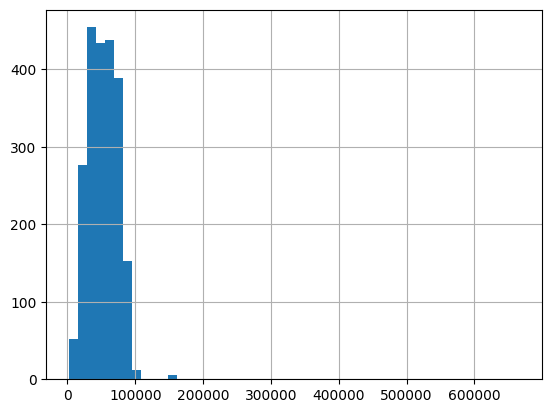

In [335]:
# rellenar con un estadistico general
mdf['yearly_income'].hist(bins=50)

In [336]:
tabla = pd.DataFrame({'A': np.random.normal(0, 10, 10000)})

In [337]:
tabla['A1'] = [np.random.choice([np.nan, i], p=(0.05, 0.95)) for i in tabla['A']]
tabla['A2'] = [np.random.choice([np.nan, i], p=(0.3, 0.7)) for i in tabla['A']]
tabla['A3'] = [np.random.choice([np.nan, i], p=(0.4, 0.6)) for i in tabla['A']]

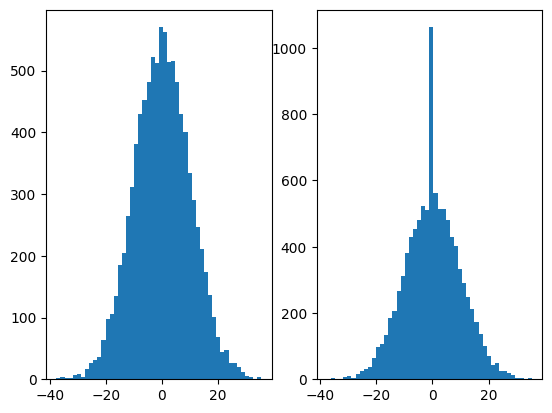

In [338]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(tabla['A1'], bins=50)
ax[1].hist(tabla['A1'].fillna(tabla['A1'].median()), bins=50)

plt.show()

In [339]:
# rellenar con un estadístico condicionado
index_nan = mdf[mdf['yearly_income'].isna()].index

In [340]:
mdf_short = mdf.dropna().sample(frac=0.1)
mdf_nan = pd.concat([mdf_short, mdf[mdf.index.isin(index_nan)]])

In [341]:
means = mdf_nan.groupby(['marital_status', 'education'])['yearly_income'].transform('mean')
meds = mdf_nan.groupby(['marital_status', 'education'])['yearly_income'].transform('median')

In [342]:
mdf_nan.groupby(['marital_status', 'education'])['yearly_income'].mean()

marital_status  education 
Absurd          2n Cycle               NaN
                Basic                  NaN
                Graduation    79244.000000
                Master                 NaN
                PhD                    NaN
Divorced        2n Cycle      78353.000000
                Basic                  NaN
                Graduation    54545.466667
                Master        44092.666667
                PhD           63114.000000
Married         2n Cycle      47500.750000
                Basic         17487.000000
                Graduation    53911.523810
                Master        56172.714286
                PhD           60165.937500
Single          2n Cycle               NaN
                Basic         26487.000000
                Graduation    52884.032258
                Master        51147.000000
                PhD           53525.000000
Together        2n Cycle      53978.250000
                Basic                  NaN
                Graduation 

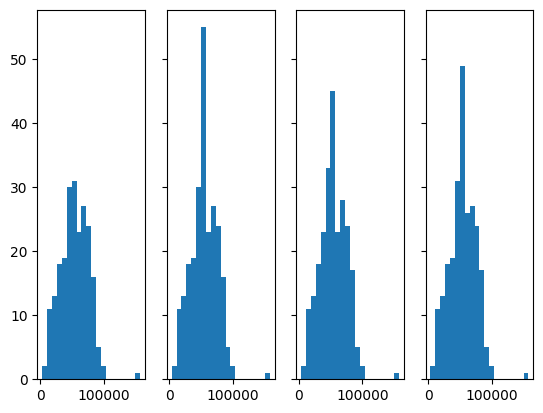

In [343]:
fig, ax = plt.subplots(1, 4, sharey=True)
ax[0].hist(mdf_nan['yearly_income'], bins=20)
ax[1].hist(mdf_nan['yearly_income'].fillna(mdf_nan['yearly_income'].mean()), bins=20)
ax[2].hist(mdf_nan['yearly_income'].fillna(meds), bins=20)
ax[3].hist(mdf_nan['yearly_income'].fillna(means), bins=20)


plt.show()


In [344]:
# rellenar con un modelo
imputer = KNNImputer(n_neighbors=4)
data = imputer.fit_transform(mdf[['edad',
                                  'kidhome',
                                  'teenhome',
                                  'mntwines',
                                  'yearly_income',
                                  'mntmeatproducts',
                                  'mntgoldprods']])
mdf[['edad',
                                  'kidhome',
                                  'teenhome',
                                  'mntwines',
                                  'yearly_income',
                                  'mntmeatproducts',
                                  'mntgoldprods']] = data
mdf

,id,education,marital_status,yearly_income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,...,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,complain,acceptedcmps,edad,cat_edad,cat_income
0,5524,Graduation,Single,58138.0,0.0,0.0,04-09-2012,635.0,88,546.0,...,88,88.0,8,10,4,0,0,66.0,adulto mayor,muy bajo
1,2174,Graduation,Single,46344.0,1.0,1.0,08-03-2014,11.0,1,6.0,...,1,6.0,1,1,2,0,0,69.0,adulto mayor,muy bajo
2,4141,Graduation,Together,71613.0,0.0,0.0,21-08-2013,426.0,49,127.0,...,21,42.0,8,2,10,0,0,58.0,adulto mayor,muy bajo
3,6182,Graduation,Together,26646.0,1.0,0.0,10-02-2014,11.0,4,20.0,...,3,5.0,2,0,4,0,0,39.0,adulto,muy bajo
4,5324,PhD,Married,58293.0,1.0,0.0,19-01-2014,173.0,43,118.0,...,27,15.0,5,3,6,0,0,42.0,adulto,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0.0,1.0,13-06-2013,709.0,43,182.0,...,118,247.0,9,3,4,0,0,56.0,adulto mayor,muy bajo
2236,4001,PhD,Together,64014.0,2.0,1.0,10-06-2014,406.0,0,30.0,...,0,8.0,8,2,5,0,1,77.0,adulto mayor,muy bajo
2237,7270,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,908.0,48,217.0,...,12,24.0,2,3,13,0,1,42.0,adulto,muy bajo
2238,8235,Master,Together,69245.0,0.0,1.0,24-01-2014,428.0,30,214.0,...,30,61.0,6,5,10,0,0,67.0,adulto mayor,muy bajo


### Escalar y normalizar

In [345]:
# variables categóricas: dummy


In [346]:
# variables categóricas: ordenadas

In [347]:
# estandarizar una columna

In [348]:
# normalizar una variable

### Trabajar con fechas

- `m`: month
- `Y`: year
- `d`: day
- `H`: hour
- `M`: minute
- `S`: seconds


In [349]:
mdf['dt_customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: dt_customer, Length: 2240, dtype: object

In [350]:
# parse dates
mdf['dt_customer'] = pd.to_datetime(mdf['dt_customer'], format='%d-%m-%Y')

In [351]:
# extraer fecha
# extraer dia
# extraer mes
# extraer año
mdf['year_customer'] = mdf['dt_customer'].dt.year
# extraer dia de la semana
# extraer semana del año

In [352]:
mdf['yearly_income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: yearly_income, Length: 2240, dtype: float64

### Outliers

In [353]:
# univariados yearly_income
q1 = mdf['yearly_income'].quantile(.25)
q3 = mdf['yearly_income'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

mdf = mdf[(mdf['yearly_income'] >= lim_inf) & (mdf['yearly_income'] <= lim_sup)]
mdf['yearly_income'].describe()

count      2231.000000
mean      51574.744173
std       20680.430275
min        1730.000000
25%       35196.000000
50%       51195.000000
75%       68134.000000
max      113734.000000
Name: yearly_income, dtype: float64

<Axes: >

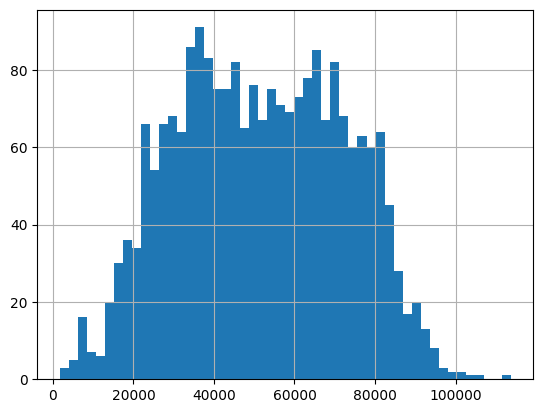

In [355]:
mdf['yearly_income'].hist(bins=50)

In [ ]:
# multivariados (primer ejemplo)

## Análisis exploratorio de datos

- Estadística descriptiva
  - Análisis univariado
    - Tendencia central
    - Dispersión
    - Curtosis
    - Simetría
  - Análisis bivariado
    - Correlación
    - Distancias
    - Covarianza
- Análisis gráfico
  - Análisis univariado
    - Distribución
  - Análisis bivariado
    - Relación
      - Numérica vs. numérica
      - Númerica vs. categórica

### Estadística descriptiva

#### Análisis univariado

In [356]:
# tendencia central
mdf.mean()

<ipython-input-356-a9463ac38192>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mdf.mean()
<ipython-input-356-a9463ac38192>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdf.mean()


id                      5589.333931
yearly_income          51574.744173
kidhome                    0.444644
teenhome                   0.507396
mntwines                 305.052443
mntfruits                 26.391304
mntmeatproducts          164.673241
mntfishproducts           37.656208
mntsweetproducts          27.165845
mntgoldprods              44.176154
numwebpurchases            4.099507
numcatalogpurchases        2.637382
numstorepurchases          5.810399
complain                   0.009413
acceptedcmps               0.298521
edad                      54.211564
year_customer           2013.028238
dtype: float64

In [357]:
# dispersión
mdf.var()

<ipython-input-357-fc2254e64ce9>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdf.var()


id                     1.053939e+07
yearly_income          4.276802e+08
kidhome                2.900957e-01
teenhome               2.966942e-01
mntwines               1.134415e+05
mntfruits              1.586199e+03
mntmeatproducts        4.722613e+04
mntfishproducts        2.991988e+03
mntsweetproducts       1.708315e+03
mntgoldprods           2.726312e+03
numwebpurchases        7.695027e+00
numcatalogpurchases    7.817777e+00
numstorepurchases      1.050619e+01
complain               9.328399e-03
acceptedcmps           4.615180e-01
edad                   1.437947e+02
year_customer          4.687090e-01
dtype: float64

In [358]:
mdf.std()

<ipython-input-358-c21d73330487>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdf.std()


id                                     3246.442089
yearly_income                         20680.430275
kidhome                                   0.538605
teenhome                                  0.544696
dt_customer            202 days 03:44:20.529863650
mntwines                                336.810847
mntfruits                                39.827112
mntmeatproducts                         217.315729
mntfishproducts                          54.699068
mntsweetproducts                         41.331768
mntgoldprods                             52.214098
numwebpurchases                           2.773991
numcatalogpurchases                       2.796029
numstorepurchases                         3.241325
complain                                  0.096584
acceptedcmps                              0.679351
edad                                     11.991442
year_customer                             0.684623
dtype: object

In [ ]:
# curtosis

In [ ]:
# simetría

#### Análisis bivariado

<ipython-input-360-362c9d7d3999>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mdf.corr())


<Axes: >

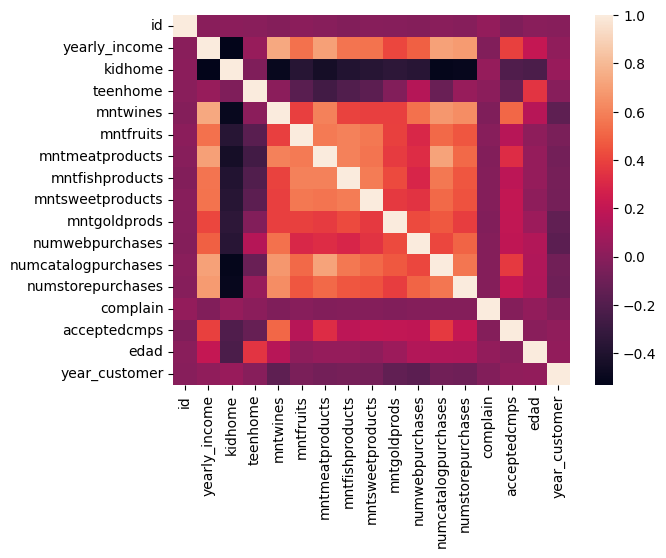

In [360]:
# análisis de correlación
sns.heatmap(mdf.corr())

<ipython-input-361-7b10f9503e3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mdf.corr(method='spearman'))


<Axes: >

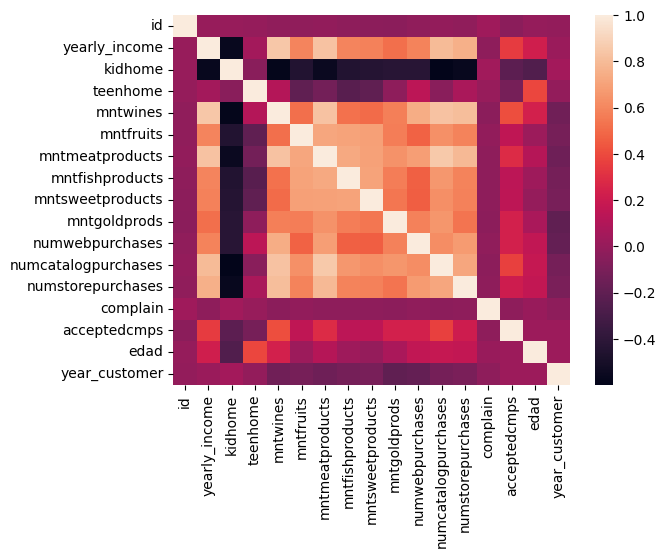

In [361]:
sns.heatmap(mdf.corr(method='spearman'))

In [364]:
num_cols = mdf.select_dtypes(['int64', 'float64']).drop(columns='id')

<Axes: >

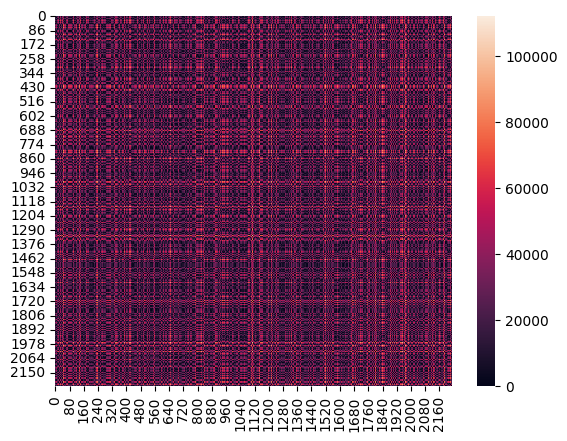

In [365]:
# distancias
sns.heatmap(distance_matrix(num_cols.values, num_cols.values))

In [ ]:
# varianzas y covarianzas

<Axes: >

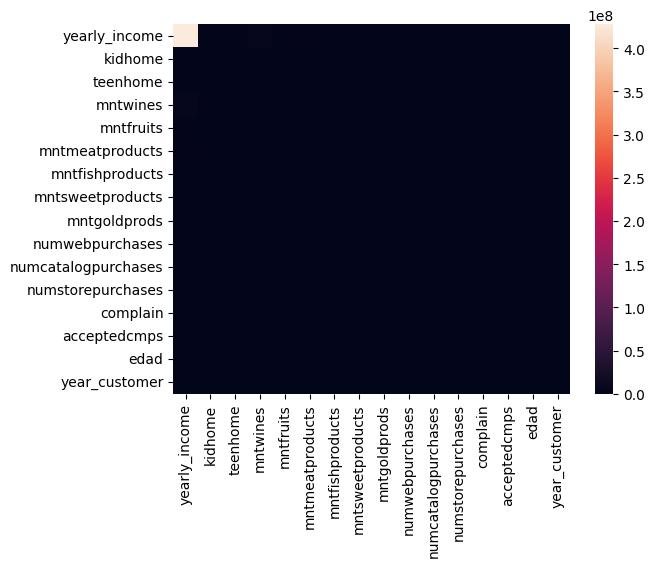

In [369]:
sns.heatmap(num_cols.cov())

In [ ]:
# matriz de contingencia

### Análisis gráfico

#### Análisis univariado

In [ ]:
# distribución


#### Análisis bivariado

In [ ]:
# relación num vs. num


In [ ]:
# relación num vs. cat


### Probando hipótesis

- Diferencia de medias
- Diferencia de varianzas
- Relación de variables categóricas


#### Diferencia de medias

In [ ]:
# ttest

#### Diferencia de varianzas

In [ ]:
# levene

#### Relación de variables categóricas

In [ ]:
# chi2